In [76]:
import time
import numpy as np
import pandas as pd
import seaborn as sb
from IPython.display import display, clear_output 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 9)

### Loading the Data

In [2]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("SampleSubmission.csv")
ID = pd.read_csv("IdLookupTable.csv")

### Splitting Training Data into Labels and Data

In [73]:
def create_training(train_csv):
    label_names = train_csv.columns.tolist()[:-1]
    labels = train_csv.loc[:, train_csv.columns != 'Image'].values

    data = train_csv['Image'].str.split()
    data = data.apply(lambda row: np.asarray([int(n) for n in row])).values
    data = data/255.0 # Rescale grayscale values to [0,1].
    
    # Shuffle the data
    shuffle = np.random.permutation(np.arange(data.shape[0]))
    data, labels = data[shuffle], labels[shuffle]
    
    # Splitting into dev and training
    dev_data, dev_labels = data[:1000], labels[:1000]
    train_data, train_labels = data[1000:], labels[1000:]
    
    return dev_data, dev_labels, train_data, train_labels, label_names

In [74]:
dev_data, dev_labels, train_data, train_labels, label_names = create_training(train)

### Plotting an Example

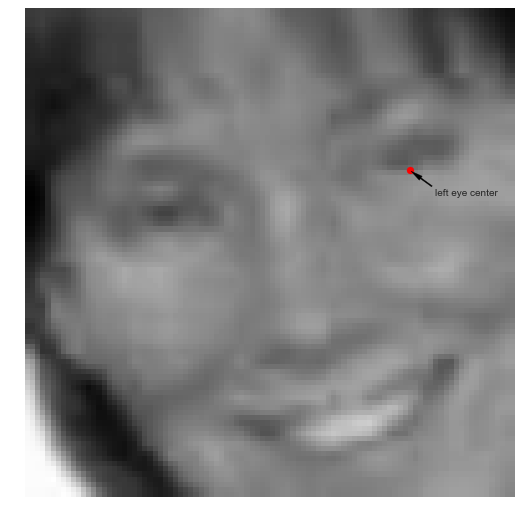

In [127]:
def plot_example(image_number):
    plt.imshow(dev_data[image_number].reshape(96, 96), cmap='gray')
    plt.axis('off')
    plt.scatter(dev_labels[image_number][0], dev_labels[image_number][1], c='red', marker='o')
    plt.annotate('left eye center', xy         =(dev_labels[image_number][0], dev_labels[image_number][1]), 
                                    xytext     =(dev_labels[image_number][0]+5, dev_labels[image_number][1]+5),
                                    arrowprops ={'facecolor': 'black', 'shrink': 0.05, 'width':1.2, 'headwidth': 5})
    return

plot_example(5)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [ ]:
## Now we format training labels
##
## 30 labels total
## we want them to be in order of submittal file
##
## Creating a matrix of n_samples (7049) X n_labels (30)
Y = np.zeros((7049,30))
labels = train.columns.tolist()[0:30] ## should give us the column labels

for i in range(7049):
    for idx, col in enumerate(labels):
        Y[i][idx] = train[col][i]

#print(Y[4][29] == train['mouth_center_bottom_lip_y'][4])

In [ ]:
print(train.columns.tolist()[0:30])
print(type(Y))
print(Y.shape)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
## splitting training data
x_sub_train = X[:4000]
x_sub_dev = X[4000:]
y_sub_train = Y[:4000]
y_sub_dev = Y[4000:]

mod_baseline = MLPClassifier()
mod_baseline.fit(x_sub_train, y_sub_train)